In [1]:
import pandas as pd
from sklearn import preprocessing

In [2]:
pd.set_option('display.max_rows', 100)
pd.options.mode.chained_assignment = None  # default='warn'

In [38]:
url = "https://raw.githubusercontent.com/denisaflorence/predtest/main/labeled_humanities.csv"
df = pd.read_csv(url)
# df.head(n=10)

In [39]:
del df["Unnamed: 0"]
del df["Result of Acceptance"]
del df["Tally of Acceptance"]

In [40]:
a = pd.DataFrame([df.groupby(['Major ID'])['Major ID'].count()], index=["jumlah_daftar"]).T
b = pd.DataFrame([df.groupby(['Major ID'])['Capacity'].max()], index=["kapasitas"]).T

In [41]:
ha = pd.concat([a, b], axis=1)
ha = ha.reset_index()
ha.head()

,Major ID,jumlah_daftar,kapasitas
0,1112017,17,64
1,1112025,38,64
2,1112033,35,64
3,1112041,67,160
4,1112056,7,36


In [42]:
df = df.set_index("Major ID")

In [43]:
df = df.join(a)

In [44]:
df = df.sort_values(by=["Major ID", "Avg Score Student Humanities"])
df = df.reset_index()
df

,Major ID,User ID,Economy,Geography,Reading Comprehension & Writing for Humanities,General Reasoning for Humanities,Quantitative Skills for Humanities,Mathematics,General Knowledge & Understanding for Humanities,History,Sociology,Avg Potency Test Humanities,Avg Score Student Humanities,Departement,Major Name,Capacity,University,jumlah_daftar
0,1112017,215761,410,311,386,397,495,657,281,552,505,389.75,443.78,humanities,EKONOMI PEMBANGUNAN,64,UNIVERSITAS SYIAH KUALA,17
1,1112017,306921,502,488,580,361,406,467,375,525,459,430.50,462.56,humanities,EKONOMI PEMBANGUNAN,64,UNIVERSITAS SYIAH KUALA,17
2,1112017,234994,384,466,499,521,401,429,559,454,529,495.00,471.33,humanities,EKONOMI PEMBANGUNAN,64,UNIVERSITAS SYIAH KUALA,17
3,1112017,307517,574,497,377,495,416,485,500,363,546,447.00,472.56,humanities,EKONOMI PEMBANGUNAN,64,UNIVERSITAS SYIAH KUALA,17
4,1112017,201889,461,368,612,416,433,507,550,390,530,502.75,474.11,humanities,EKONOMI PEMBANGUNAN,64,UNIVERSITAS SYIAH KUALA,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61193,9212073,319247,573,588,628,546,411,497,518,474,319,525.75,506.00,humanities,PENDIDIKAN BAHASA INGGRIS,16,UNIVERSITAS PAPUA,8
61194,9212073,277720,494,545,539,499,564,505,499,567,593,525.25,533.89,humanities,PENDIDIKAN BAHASA INGGRIS,16,UNIVERSITAS PAPUA,8
61195,9212073,256141,441,535,611,667,427,451,634,575,546,584.75,543.00,humanities,PENDIDIKAN BAHASA INGGRIS,16,UNIVERSITAS PAPUA,8
61196,9212073,190671,476,424,402,639,454,583,698,615,699,548.25,554.44,humanities,PENDIDIKAN BAHASA INGGRIS,16,UNIVERSITAS PAPUA,8


#### Nyoba MinMax Scaler

In [45]:
# Masukin rank
coba_aa = []
for i in ha["Major ID"]:
    for a in reversed(range(len(df[df["Major ID"] == i]))):
        coba_aa.append(a+1)

cobanya = pd.DataFrame(coba_aa, columns=["rank"])
df["rank"] = cobanya
df.head(100)

,Major ID,User ID,Economy,Geography,Reading Comprehension & Writing for Humanities,General Reasoning for Humanities,Quantitative Skills for Humanities,Mathematics,General Knowledge & Understanding for Humanities,History,Sociology,Avg Potency Test Humanities,Avg Score Student Humanities,Departement,Major Name,Capacity,University,jumlah_daftar,rank
0,1112017,215761,410,311,386,397,495,657,281,552,505,389.75,443.78,humanities,EKONOMI PEMBANGUNAN,64,UNIVERSITAS SYIAH KUALA,17,17
1,1112017,306921,502,488,580,361,406,467,375,525,459,430.50,462.56,humanities,EKONOMI PEMBANGUNAN,64,UNIVERSITAS SYIAH KUALA,17,16
2,1112017,234994,384,466,499,521,401,429,559,454,529,495.00,471.33,humanities,EKONOMI PEMBANGUNAN,64,UNIVERSITAS SYIAH KUALA,17,15
3,1112017,307517,574,497,377,495,416,485,500,363,546,447.00,472.56,humanities,EKONOMI PEMBANGUNAN,64,UNIVERSITAS SYIAH KUALA,17,14
4,1112017,201889,461,368,612,416,433,507,550,390,530,502.75,474.11,humanities,EKONOMI PEMBANGUNAN,64,UNIVERSITAS SYIAH KUALA,17,13
5,1112017,226049,344,471,662,483,525,480,443,537,371,528.25,479.56,humanities,EKONOMI PEMBANGUNAN,64,UNIVERSITAS SYIAH KUALA,17,12
6,1112017,317643,693,353,381,472,380,481,502,661,520,433.75,493.67,humanities,EKONOMI PEMBANGUNAN,64,UNIVERSITAS SYIAH KUALA,17,11
7,1112017,83104,519,520,590,552,586,424,466,452,348,548.50,495.22,humanities,EKONOMI PEMBANGUNAN,64,UNIVERSITAS SYIAH KUALA,17,10
8,1112017,208875,593,473,434,496,520,599,529,377,516,494.75,504.11,humanities,EKONOMI PEMBANGUNAN,64,UNIVERSITAS SYIAH KUALA,17,9
9,1112017,114786,624,612,443,449,432,422,548,580,503,468.00,512.56,humanities,EKONOMI PEMBANGUNAN,64,UNIVERSITAS SYIAH KUALA,17,8


In [242]:
df.to_csv(r'Humanities_clean.csv', index=False)

In [259]:
# 1 jumlah daftar <= capacity. cont: capacity = 88. Rank teratas paling besar, kalau rank 1 (direversed jadi 88) -> (rank_reversed *100) / capacity
# 1b  setelah (rank_reversed *100) / capacity <= 75% diset jadi 75% (nilai minimum)
# 2 jumlah daftar > capacity 
# 2a reversed_rank <= capacity = (rank_reversed *100) / capacity
# 2b reversed_rank > capacity = 0
# 2b reversed_rank > capacity = capacity/20% 

In [46]:
# scaler = preprocessing.MinMaxScaler(feature_range=(0, 0.5))
scaler = preprocessing.MinMaxScaler(feature_range=(0, 0.5))
minmax_df = scaler.fit_transform(cobanya)
minmax_df = pd.DataFrame(minmax_df, columns =['rank_scaled'])
minmax_df.rank_scaled = 1-minmax_df.rank_scaled
minmax_df


,rank_scaled
0,0.988904
1,0.989598
2,0.990291
3,0.990985
4,0.991678
...,...
61193,0.997226
61194,0.997920
61195,0.998613
61196,0.999307


In [47]:
# minmax_df['rank_scaled'] = 1-minmax_df['rank_scaled']
# minmax_df['rank_scaled'] = minmax_df['rank_scaled']
minmax_df['rank'] = cobanya
minmax_df

,rank_scaled,rank
0,0.988904,17
1,0.989598,16
2,0.990291,15
3,0.990985,14
4,0.991678,13
...,...,...
61193,0.997226,5
61194,0.997920,4
61195,0.998613,3
61196,0.999307,2


In [48]:
# df['rank_scaled'] = minmax_df['rank_scaled']
df.dtypes

Major ID                                              int64
User ID                                               int64
Economy                                               int64
Geography                                             int64
Reading Comprehension & Writing for Humanities        int64
General Reasoning for Humanities                      int64
Quantitative Skills for Humanities                    int64
Mathematics                                           int64
General Knowledge & Understanding for Humanities      int64
History                                               int64
Sociology                                             int64
Avg Potency Test Humanities                         float64
Avg Score Student Humanities                        float64
Departement                                          object
Major Name                                           object
Capacity                                              int64
University                              

In [50]:
# Kasih persentase INI YANG BENAR
scaler = preprocessing.MinMaxScaler(feature_range=(0, 0.5))
low_df = scaler.fit_transform(df.loc[(df["rank"] > df["Capacity"]), ['rank']])
low_df = pd.DataFrame(low_df, columns =['rank_scaled'])

low_df['rank_scaled'].isnull().values.any()

False

In [51]:
df['rank_scaled'] = minmax_df.rank_scaled

In [52]:
# INI JUGA BENAR
# df[df["rank"] > df["Capacity"]][['rank_scaled']] = low_df['rank_scaled']*100
df.loc[(df["rank"] > df["Capacity"]), ['rank_scaled']] = (0.5 - low_df['rank_scaled'])*100
# df[df["rank"] <= df["Capacity"]][['rank_scaled']] = minmax_df['rank_scaled']*100
df.loc[df["rank"] <= df["Capacity"], ['rank_scaled']]= minmax_df['rank_scaled']*100

In [53]:
df.loc[(df["rank"] > df["Capacity"]), ['rank_scaled']]

,rank_scaled
610,29.196051
611,29.266573
612,29.337094
613,29.407616
614,29.478138
...,...
60396,NaN
60397,NaN
60398,NaN
60399,NaN


In [54]:
new_index = pd.DataFrame(df.index[df["rank"] > df["Capacity"]], columns=['index'])
# new_index
low_df = low_df.join(new_index)
low_df

,rank_scaled,index
0,0.061354,610
1,0.060649,611
2,0.059944,612
3,0.059238,613
4,0.058533,614
...,...,...
22040,0.036671,60396
22041,0.035966,60397
22042,0.035261,60398
22043,0.034556,60399


In [55]:
# reset index si low_df
low_df.reset_index()
low_df = low_df.set_index("index")
low_df

,rank_scaled
index,
610,0.061354
611,0.060649
612,0.059944
613,0.059238
614,0.058533
...,...
60396,0.036671
60397,0.035966
60398,0.035261


In [56]:
# ganti value di df asli
# INI JUGA BENAR
# df[df["rank"] > df["Capacity"]][['rank_scaled']] = low_df['rank_scaled']*100
df.loc[(df["rank"] > df["Capacity"]), ['rank_scaled']] = (0.5 - low_df['rank_scaled'])*100
# df[df["rank"] <= df["Capacity"]][['rank_scaled']] = minmax_df['rank_scaled']*100
df.loc[df["rank"] <= df["Capacity"], ['rank_scaled']]= minmax_df['rank_scaled']*100

In [57]:
df.loc[df["rank"] <= df["Capacity"], ['rank_scaled']]

,rank_scaled
0,98.890430
1,98.959778
2,99.029126
3,99.098474
4,99.167822
...,...
61193,99.722607
61194,99.791956
61195,99.861304
61196,99.930652


In [58]:
df['rank_scaled'].isnull().values.any()

False

In [72]:
# low_scaler = preprocessing.MinMaxScaler(feature_range=(0, 0.5))
# low_df = low_scaler.fit_transform(df.loc[(df["rank"] > df["Capacity"]), ['rank_scaled']])
# low_df = pd.DataFrame(low_df, columns =['rank_scaled'])

# scaler = preprocessing.MinMaxScaler(feature_range=(0.8, 1))
# minmax_df = scaler.fit_transform(df.loc[df["rank"] <= df["Capacity"], ['rank_scaled']])
# minmax_df = pd.DataFrame(minmax_df, columns =['rank_scaled'])
# minmax_df

# # df[df["rank"] > df["Capacity"]][['rank_scaled']] = low_df['rank_scaled']*100
# df.loc[(df["rank"] > df["Capacity"]), ['rank_scaled']] = (0.5 - low_df['rank_scaled'])*100
# # df[df["rank"] <= df["Capacity"]][['rank_scaled']] = minmax_df['rank_scaled']*100
# df.loc[df["rank"] <= df["Capacity"], ['rank_scaled']]= minmax_df['rank_scaled']*100

In [74]:
# # INI GA DIPAKE
# low_scaler = preprocessing.MinMaxScaler(feature_range=(0.1, 0.5))
# low_df = low_scaler.fit_transform(df.loc[(df["rank"] > df["Capacity"]), ['rank']])
# low_df = pd.DataFrame(low_df, columns =['rank_scaled'])

# scaler = preprocessing.MinMaxScaler(feature_range=(0.6, 1))
# minmax_df = scaler.fit_transform(df.loc[(df["rank"] <= df["Capacity"]), ['rank']])
# minmax_df = pd.DataFrame(minmax_df, columns =['rank_scaled'])
# minmax_df
# # total 47751 rows × 1 columns

# # low_data = df.loc[(df["rank"] > df["Capacity"]), ['rank_scaled']]
# # high_data = df.loc[df["rank"] <= df["Capacity"], ['rank_scaled']]
# # df[df["rank"] > df["Capacity"]][['rank_scaled']] = low_df['rank_scaled']*100

# df['rank_scaled'].loc[(df["rank"] > df["Capacity"])] = (0.5 - low_df['rank_scaled'])*100
# # df[df["rank"] <= df["Capacity"]][['rank_scaled']] = minmax_df['rank_scaled']*100

# df['rank_scaled'].loc[(df["rank"] <= df["Capacity"])] = minmax_df['rank_scaled']*100

In [59]:
minmax_df['rank'] = cobanya
minmax_df

,rank_scaled,rank
0,0.988904,17
1,0.989598,16
2,0.990291,15
3,0.990985,14
4,0.991678,13
...,...,...
61193,0.997226,5
61194,0.997920,4
61195,0.998613,3
61196,0.999307,2


In [60]:
# df['rank_scaled'] = minmax_df['rank_scaled']*100
df.rank_scaled.loc[(df["rank"] > df["Capacity"])]
# low_df

610      43.864598
611      43.935120
612      44.005642
613      44.076164
614      44.146685
           ...    
60396    46.332863
60397    46.403385
60398    46.473907
60399    46.544429
60400    46.614951
Name: rank_scaled, Length: 22045, dtype: float64

In [61]:
df.loc[(df["rank"] <= df["Capacity"])]

,Major ID,User ID,Economy,Geography,Reading Comprehension & Writing for Humanities,General Reasoning for Humanities,Quantitative Skills for Humanities,Mathematics,General Knowledge & Understanding for Humanities,History,Sociology,Avg Potency Test Humanities,Avg Score Student Humanities,Departement,Major Name,Capacity,University,jumlah_daftar,rank,rank_scaled
0,1112017,215761,410,311,386,397,495,657,281,552,505,389.75,443.78,humanities,EKONOMI PEMBANGUNAN,64,UNIVERSITAS SYIAH KUALA,17,17,98.890430
1,1112017,306921,502,488,580,361,406,467,375,525,459,430.50,462.56,humanities,EKONOMI PEMBANGUNAN,64,UNIVERSITAS SYIAH KUALA,17,16,98.959778
2,1112017,234994,384,466,499,521,401,429,559,454,529,495.00,471.33,humanities,EKONOMI PEMBANGUNAN,64,UNIVERSITAS SYIAH KUALA,17,15,99.029126
3,1112017,307517,574,497,377,495,416,485,500,363,546,447.00,472.56,humanities,EKONOMI PEMBANGUNAN,64,UNIVERSITAS SYIAH KUALA,17,14,99.098474
4,1112017,201889,461,368,612,416,433,507,550,390,530,502.75,474.11,humanities,EKONOMI PEMBANGUNAN,64,UNIVERSITAS SYIAH KUALA,17,13,99.167822
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61193,9212073,319247,573,588,628,546,411,497,518,474,319,525.75,506.00,humanities,PENDIDIKAN BAHASA INGGRIS,16,UNIVERSITAS PAPUA,8,5,99.722607
61194,9212073,277720,494,545,539,499,564,505,499,567,593,525.25,533.89,humanities,PENDIDIKAN BAHASA INGGRIS,16,UNIVERSITAS PAPUA,8,4,99.791956
61195,9212073,256141,441,535,611,667,427,451,634,575,546,584.75,543.00,humanities,PENDIDIKAN BAHASA INGGRIS,16,UNIVERSITAS PAPUA,8,3,99.861304
61196,9212073,190671,476,424,402,639,454,583,698,615,699,548.25,554.44,humanities,PENDIDIKAN BAHASA INGGRIS,16,UNIVERSITAS PAPUA,8,2,99.930652


In [65]:
df.isna().sum()

Major ID                                            0
User ID                                             0
Economy                                             0
Geography                                           0
Reading Comprehension & Writing for Humanities      0
General Reasoning for Humanities                    0
Quantitative Skills for Humanities                  0
Mathematics                                         0
General Knowledge & Understanding for Humanities    0
History                                             0
Sociology                                           0
Avg Potency Test Humanities                         0
Avg Score Student Humanities                        0
Departement                                         0
Major Name                                          0
Capacity                                            0
University                                          0
jumlah_daftar                                       0
rank                        

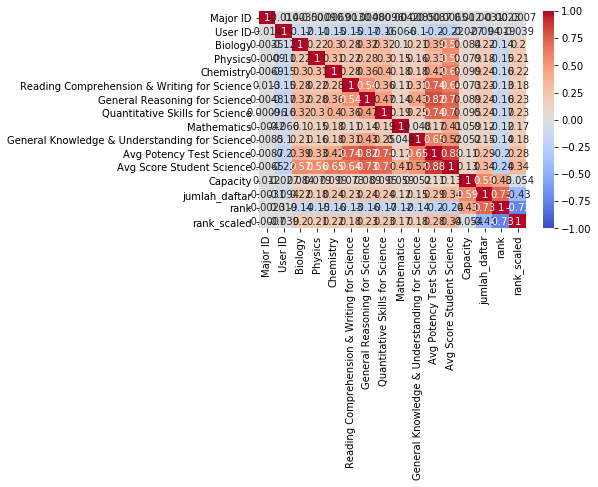

In [31]:
import seaborn as sns
sns.heatmap(df.corr(), vmin=-1, vmax=1, cmap="coolwarm", annot=True)

In [25]:
# del df["Departement"]
# del df["Major Name"]
# del df["University"]

In [110]:
# COBA 1
# del df["rank"]

In [76]:
# del df["Capacity"]

In [66]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
# from sklearn import metrics
from sklearn.metrics import mean_squared_error
import statsmodels.formula.api as smf


In [67]:
X = df[['Major ID', 'Economy', 'Geography', 'History','Sociology',
       'Reading Comprehension & Writing for Humanities',
       'General Reasoning for Humanities', 'Quantitative Skills for Humanities',
       'Mathematics', 'General Knowledge & Understanding for Humanities',
       'Avg Potency Test Humanities', 'Avg Score Student Humanities', 'Capacity']].values
y = df.iloc[:, -1].values

In [74]:
df.iloc[:, :-1].columns

Index(['Major ID', 'User ID', 'Economy', 'Geography',
       'Reading Comprehension & Writing for Humanities',
       'General Reasoning for Humanities',
       'Quantitative Skills for Humanities', 'Mathematics',
       'General Knowledge & Understanding for Humanities', 'History',
       'Sociology', 'Avg Potency Test Humanities',
       'Avg Score Student Humanities', 'Departement', 'Major Name', 'Capacity',
       'University', 'jumlah_daftar', 'rank'],
      dtype='object')

In [69]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

### Nyoba DTRegressor

In [70]:
# import the regressor
from sklearn.tree import DecisionTreeRegressor

# create a regressor object
regressor = DecisionTreeRegressor(criterion='squared_error', random_state = 0)

# fit the regressor with X and Y data
regressor.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

In [71]:
y_pred = regressor.predict(X_test)
evaluate = pd.DataFrame(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1), 
                        columns=["Prediction", "Test"])
evaluate.head()

,Prediction,Test
0,99.029126,98.890430
1,98.058252,98.404993
2,36.953456,37.094499
3,96.463245,96.601942
4,99.861304,99.722607


In [72]:
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
# Memasukkan nilai konstanta pada model
X = sm.add_constant(X)
# Mencetak hasil regresi dan penilaian model
model = sm.OLS(y, X).fit()
# print(model.summary())
print("Root Mean Squared Error (RMSE): ", np.sqrt(mean_squared_error(y_test, y_pred)))
# print('Model Score: ', regressor.score(np.array(X_test), y_test))
print('Model Score: ',regressor.score(X_test,y_test))

Root Mean Squared Error (RMSE):  10.092183533194092
Model Score:  0.8625841883183729


In [ ]:
# 9211352	200231	513	413	336	365	389	338	531	503	398.75	423.50	science	TEKNIK SIPIL	16	UNIVERSITAS PAPUA	9	9	

In [35]:
import pickle
with open('model_humanities_tree','wb') as r:
    pickle.dump(regressor,r)

In [73]:
# predicting a new value
# 'Major ID', 'Economy', 'Geography', 'History','Sociology',
#        'Reading Comprehension & Writing for Humanities',
#        'General Reasoning for Humanities', 'Quantitative Skills for Humanities',
#        'Mathematics', 'General Knowledge & Understanding for Humanities',
#        'Avg Potency Test Humanities', 'Avg Score Student Humanities', 'Capacity'
# test the output by changing values
# ada nilai default, misalnya user kasi harus 
y_pred = regressor.predict([[1112017, 410, 311, 552, 505, 386, 397, 531, 503, 398, 423.50, 24]])

# print the predicted rank
print(y_pred)


[99.83277592]
